In [39]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math


# Select the time point

In [75]:
SelectedTime = '3d'

In [76]:
# make DF from MasterDF.csv 
os.chdir(r'O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v2\All_summary')

DF = pd.read_csv('MasterDF.csv', index_col=None)
DF = DF.iloc[:,1:]
DF = DF.set_index(DF['Population'])

In [77]:
CellLineList = ['BT483', 'MCF7', 'T47D', 'EFM19']
TreatmentList = ['DMSO', 'BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'Tram', 'BYL3', 'F+BYL3']
TimeList = ['2d', '3d', '4d']
PopulationList = ['Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop1']
AntibodyList = ['pAkt_N', 'pAkt_C', 'pHis3_N', 'pHis3_C', 'bCat_N', 'bCat_C', 
                'NFkB_N', 'NFkB_C', 'Ecad_N', 'Ecad_C', 'pErk_N', 'pErk_C', 
                'pS6-235_N', 'pS6-235_C', 'pRB_N', 'pRB_C', 'Ki67_N', 'Ki67_C', 
                'pStat3_N', 'pStat3_C', 'pS6-240_N', 'pS6-240_C', 'pAurk_N', 'pAurk_C', 
                'Foxo3a_N', 'Foxo3a_C', 'pSmad1/5_N', 'pSmad1/5_C', 'pSmad2/3_N', 'pSmad2/3_C', 
                'Vimentin_N', 'Vimentin_C', 'pJNK_N', 'pJNK_C', 'pp38_N', 'pp38_C', 
                'cMyc_N', 'cMyc_C', 'p21_N', 'p21_C', 'cJun_N', 'cJun_C', 
                'Yap_N', 'Yap_C', 'aNotch1_N', 'aNotch1_C', 'pSrc_N', 'pSrc_C', 
                'p27_N', 'p27_C', 'ERa_N', 'ERa_C', 'CyclinD1_N', 'CyclinD1_C']

os.chdir(r'.\EachDay_AP_Pop2Pop34')

In [78]:


SelectedTreatment2 = TreatmentList[0]


ReferencePopulation = ['Pop2'] # this is the reference population
SelectedPopulation = ['Pop3', 'Pop4']


APList = list([])

for SelectedTreatment1 in ['BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'Tram', 'BYL3', 'F+BYL3']:


    List_4CL = list([])

    for Trm in [SelectedTreatment1, SelectedTreatment2]:

        for SelectedCellLine in CellLineList:   # Select CellLine
            index = ( (DF['CellLine'].isin([SelectedCellLine])) & 
                     (DF['Treatment'].isin([Trm])) & 
                     (DF['Time'].isin([SelectedTime]))     
                    )

            df1 = DF[index]



            Result = list([])
            for SelectedAb in AntibodyList:   # Select Antibody

                SD = np.std(df1[SelectedAb])
                Mean_Ref = np.mean(  df1[df1['Population'].isin(ReferencePopulation)][SelectedAb]  )
                Mean_Sample = np.mean(  df1[df1['Population'].isin(SelectedPopulation)][SelectedAb]  )
                NewColName = 'AS: ' + SelectedAb

                Result = Result + list([(Mean_Sample - Mean_Ref) / SD])  # This is Activation Score

            AS_df = pd.DataFrame(Result)
            AS_df = AS_df.T
            AS_df.columns = AntibodyList
            AS_df['CellLine'] = SelectedCellLine
            AS_df['Treatment'] = Trm
            AS_df['Time'] = SelectedTime

            List_4CL = List_4CL + [AS_df]

    # Make dataframe
    df_4CL = pd.concat([List_4CL[0], List_4CL[1], List_4CL[2], List_4CL[3], List_4CL[4], List_4CL[5], List_4CL[6], List_4CL[7] ])
    df_4CL = df_4CL.set_index(df_4CL['Treatment'])
    
    APList = APList + [df_4CL]

    #df_4CL

    Nuc = np.array(range(0, 54, 2))
    Cyto = np.array(range(1,54,2))

    for WhichCell in range(4):  # BT483:0, MCF7:1, T47D:2, EFM19:3


        dfbyCom = df_4CL.iloc[[WhichCell, WhichCell+4], Nuc ] #This is based on the cell line chosen.

        Summary = dfbyCom.T.sort_values(by=[SelectedTreatment1], ascending=True)

        Scores1 = Summary.iloc[:,0]
        Scores2 = Summary.iloc[:,1]

        Labels = list(Scores1.index)

        NewLabels = list([])

        for L in Labels:
            letter = L[0:-2]
            NewLabels = NewLabels + [letter]

        theta = np.arange(0, 2*pi, 2*pi/27)
        r1 = Scores1
        r2 = Scores2
        theta_degree = theta*57.2958


        fig = plt.figure()
        ax = fig.add_subplot(111, polar=True)
        c = ax.scatter(theta, r1, color='red', s=50, facecolors='none')
        d = ax.scatter(theta, r2, color='blue', s=20, marker='*')

        ax.set_rmin(0)
        ax.set_rmax(2.5)
        ax.set_theta_zero_location("N")
        lines, labels = thetagrids( theta_degree, (NewLabels) )
        lines, labels = rgrids( (0, 1, 2) )

        plt.xlabel(CellLineList[WhichCell], fontsize=13)

        # plt.show()

        fileN = SelectedTreatment1 + '_' + CellLineList[WhichCell] + '_' + SelectedTime + '.png'

        fig.savefig(fileN)

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [79]:
# Make dataframe
APdf = pd.concat([APList[0][4:], 
                        APList[0][:4], 
                        APList[1][:4], 
                        APList[2][:4], 
                        APList[3][:4], 
                        APList[4][:4], 
                        APList[5][:4], 
                        APList[6][:4], 
                        APList[7][:4],
                       ])
    

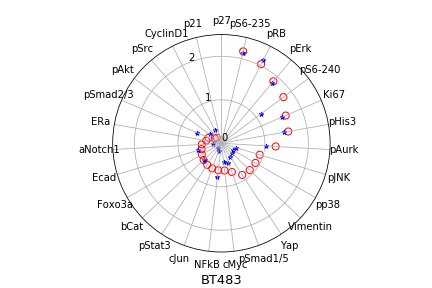

In [80]:
from IPython.display import Image
Image("BYL0.3_BT483_3d.png")

# This is to save multiple figures in one png file

In [81]:
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image

In [82]:
# make DF from MasterDF.csv 
os.chdir(r'O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v2\All_summary\EachDay_AP_Pop2Pop34')

In [83]:
for SelectedTreatment in ['BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'Tram', 'BYL3', 'F+BYL3']:


    files = [
      SelectedTreatment + '_BT483' + '_' + SelectedTime + '.png',
      SelectedTreatment + '_T47D' + '_' + SelectedTime + '.png',
      SelectedTreatment + '_MCF7' + '_' + SelectedTime + '.png',
      SelectedTreatment + '_EFM19' + '_' + SelectedTime + '.png',]

    result = Image.new("RGB", (800, 532))

    for index, file in enumerate(files):
      path = os.path.expanduser(file)
      img = Image.open(path)
      img.thumbnail((400, 266), Image.ANTIALIAS)
      x = index // 2 * 400
      y = index % 2 * 266
      w, h = img.size
      print('pos {0},{1} size {2},{3}'.format(x, y, w, h))
      result.paste(img, (x, y, x + w , y + h))
        
    Fname = SelectedTreatment + '_' + SelectedTime + '.png'

    result.save(os.path.expanduser(Fname))

pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266
pos 0,0 size 400,266
pos 0,266 size 400,266
pos 400,0 size 400,266
pos 400,266 size 400,266


In [84]:
DayFileName = 'APdf_' + SelectedTime + '.csv'
APdf.to_csv(DayFileName)